In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# mpg 데이터 시각화 및 정규성 검증(shapiro)

In [2]:
mpg = pd.read_csv('csv/mpg.csv')

### 문자열 데이터 시각화

<AxesSubplot:xlabel='manufacturer', ylabel='count'>

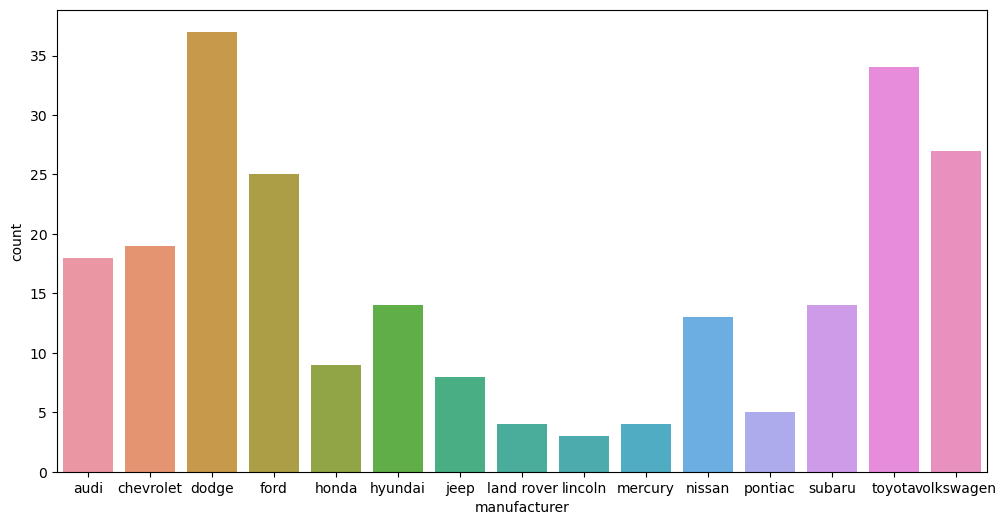

In [3]:
# manufacturer
plt.figure(figsize=(12, 6))
sns.countplot(data=mpg, x='manufacturer')

<AxesSubplot:xlabel='count', ylabel='model'>

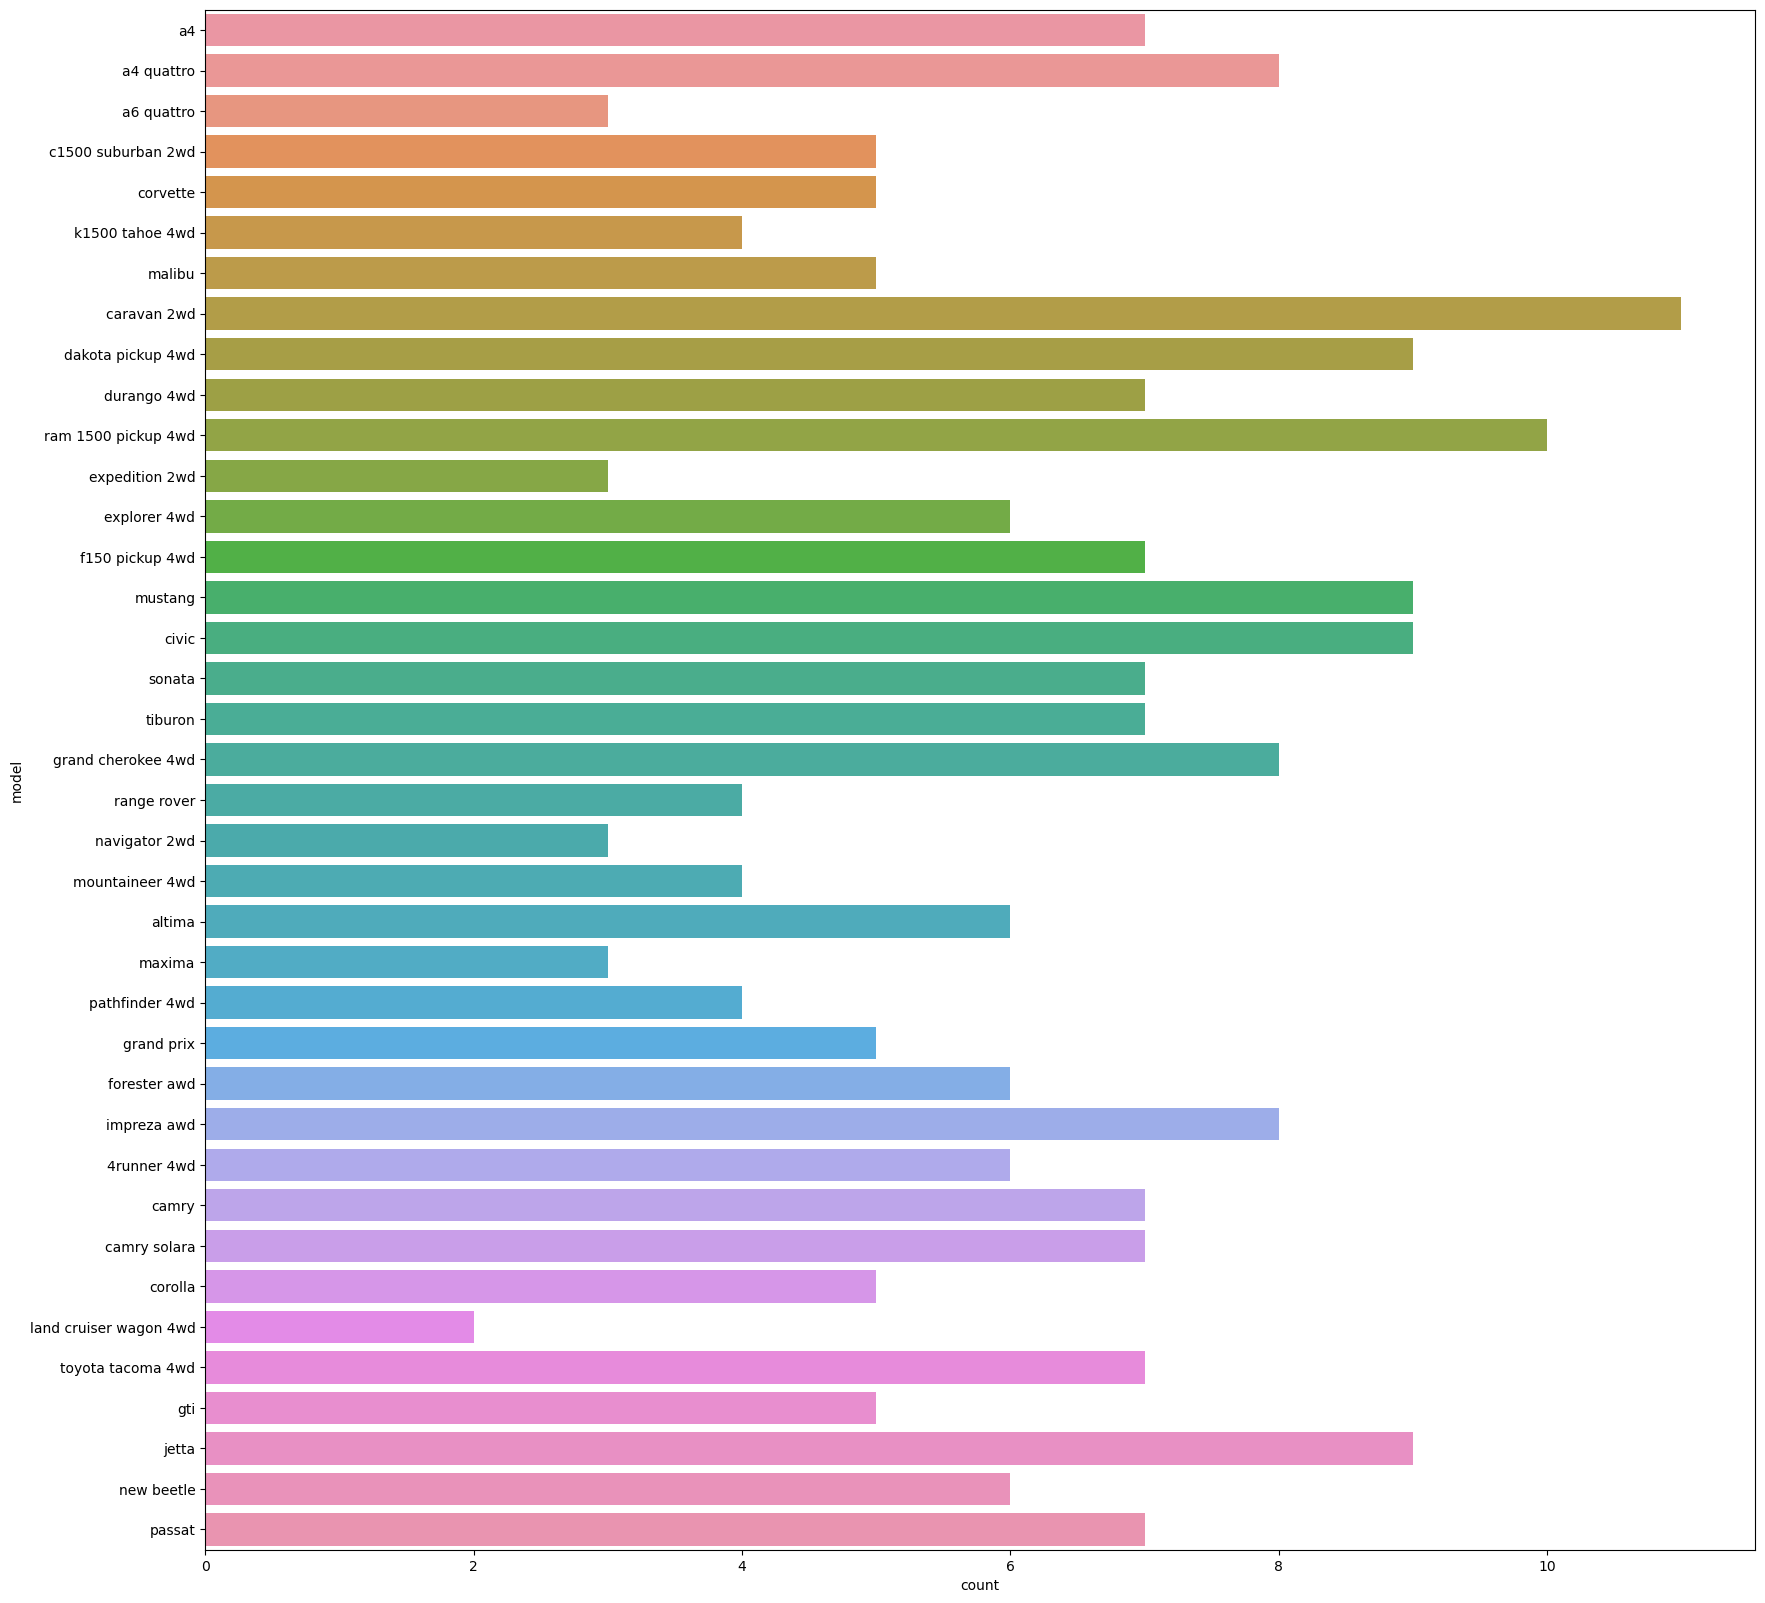

In [4]:
# model
# 세로로 하면 가독성 저하, 가로로 출력하여 크기 조정
plt.figure(figsize=(20, 20))
sns.countplot(data=mpg, y='model')

<AxesSubplot:xlabel='trans', ylabel='count'>

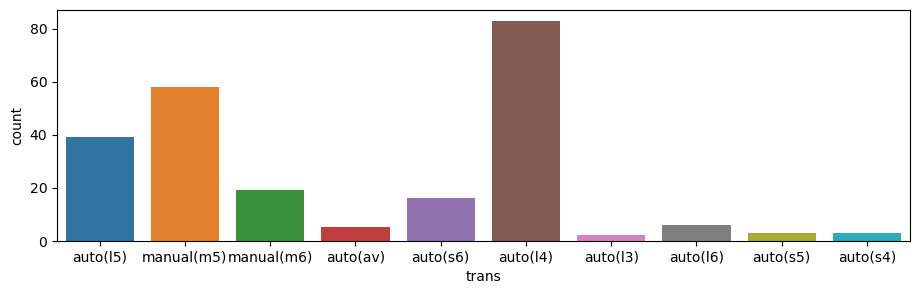

In [5]:
# trans
plt.figure(figsize=(11, 3))
sns.countplot(data=mpg, x='trans')

<AxesSubplot:xlabel='drv', ylabel='count'>

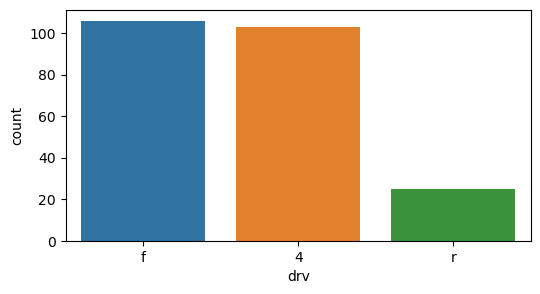

In [7]:
# drv
plt.figure(figsize=(6, 3))
sns.countplot(data=mpg, x='drv')

<AxesSubplot:xlabel='fl', ylabel='count'>

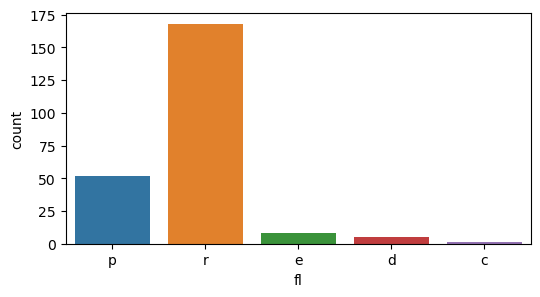

In [8]:
# fl
plt.figure(figsize=(6, 3))
sns.countplot(data=mpg, x='fl')

<AxesSubplot:xlabel='category', ylabel='count'>

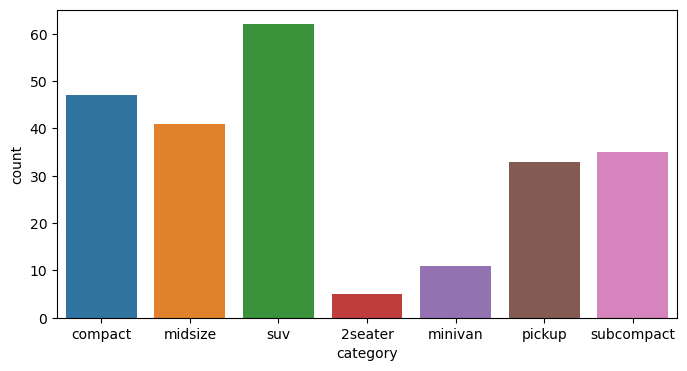

In [9]:
# category
plt.figure(figsize=(8, 4))
sns.countplot(data=mpg, x='category')

### 수치형 데이터 시각화

<AxesSubplot:xlabel='displ', ylabel='count'>

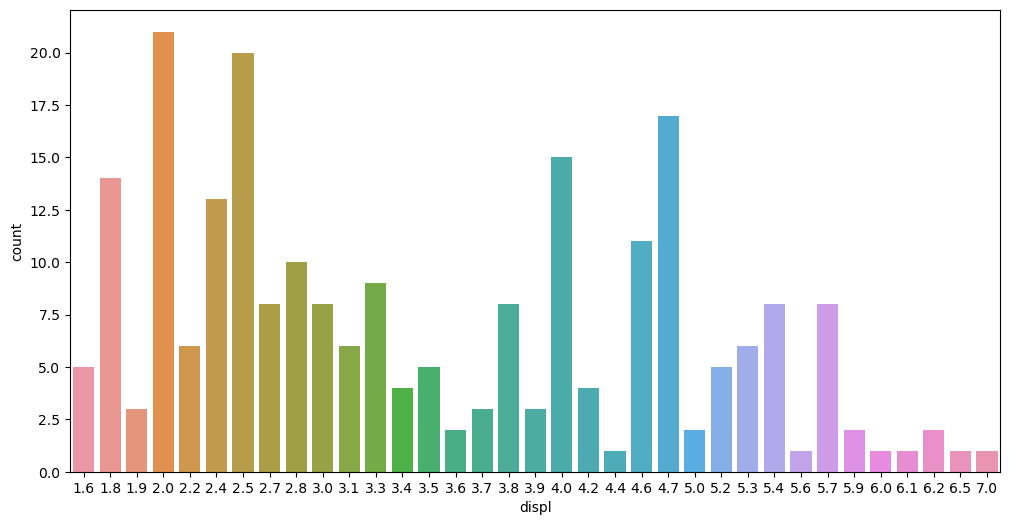

In [10]:
# displ
plt.figure(figsize=(12, 6))
sns.countplot(data=mpg, x='displ')

Statistic: 0.9408, p-value: 0.0000


<AxesSubplot:xlabel='displ', ylabel='Count'>

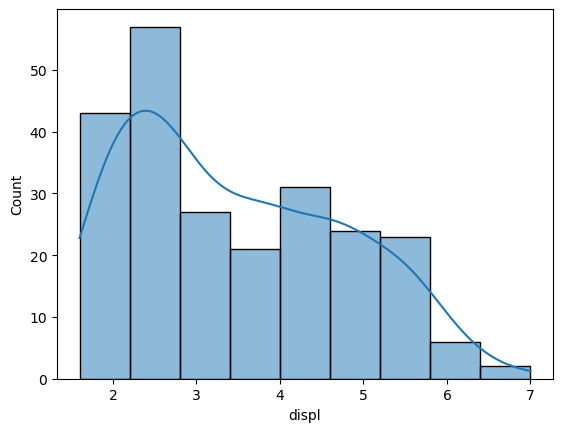

In [13]:
# displ 정규성 검증
stat, p = shapiro(mpg['displ'])
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

sns.histplot(mpg['displ'], kde=True)

# p-value가 매우 작아(0.0000) 귀무가설을 기각할 수 있다.
# 따라서 'displ' 컬럼은 정규성을 따르지 않는다고 할 수 있다.
# 시각화 그래프에서도 왼쪽으로 치우친 분포를 보이고 있다.

<AxesSubplot:xlabel='year', ylabel='count'>

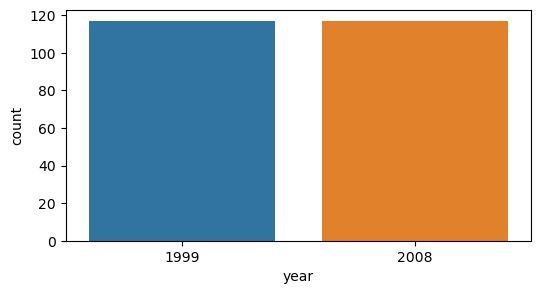

In [14]:
# year
plt.figure(figsize=(6, 3))
sns.countplot(data=mpg, x='year')

<AxesSubplot:xlabel='cyl', ylabel='count'>

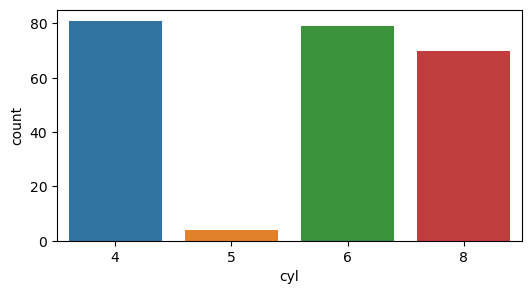

In [15]:
# cyl
plt.figure(figsize=(6, 3))
sns.countplot(data=mpg, x='cyl')

<AxesSubplot:xlabel='cty', ylabel='count'>

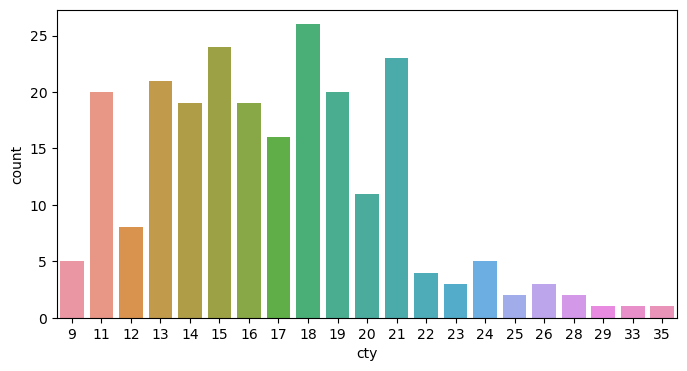

In [16]:
# cty
plt.figure(figsize=(8, 4))
sns.countplot(data=mpg, x='cty')

Statistic: 0.9568, p-value: 0.0000


<AxesSubplot:xlabel='cty', ylabel='Count'>

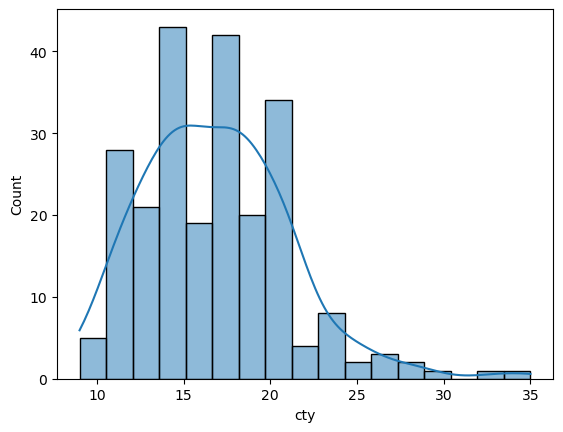

In [18]:
# cty 정규성 검증
stat, p = shapiro(mpg['cty'])
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

sns.histplot(mpg['cty'], kde=True)

# p-value가 매우 작아(0.0000) 귀무가설을 기각할 수 있다.
# 따라서 'cty' 컬럼은 정규성을 따르지 않는다고 할 수 있다.
# 시각화 그래프에서도 왼쪽으로 치우친 분포를 보이고 있다.

<AxesSubplot:xlabel='hwy', ylabel='count'>

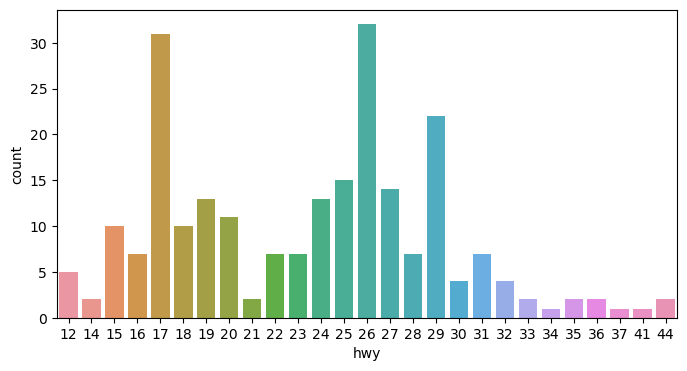

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=mpg, x='hwy')

Statistic: 0.9589, p-value: 0.0000


<AxesSubplot:xlabel='hwy', ylabel='Count'>

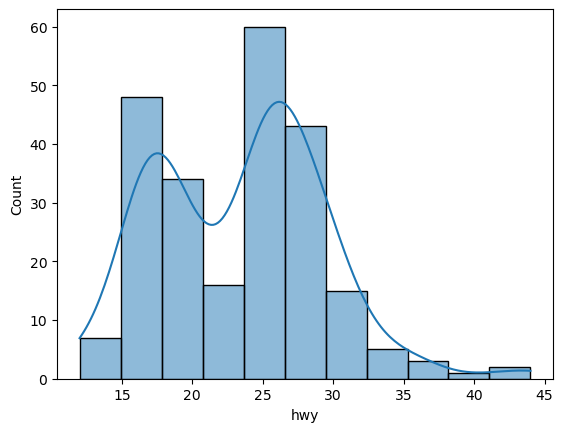

In [20]:
# hwy 정규성 검증
stat, p = shapiro(mpg['hwy'])
print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")

sns.histplot(mpg['hwy'], kde=True)

# p-value가 매우 작아(0.0000) 귀무가설을 기각할 수 있습니다.
# 따라서 'hwy' 컬럼은 정규성을 따르지 않는다고 할 수 있습니다.
# 시각화 그래프에서도 왼쪽으로 치우고 불균형한 분포를 보이고 있습니다.

# 시각화를 통한 비교분석

### manufacturer에 따른 cty와 hwy의 연비
- cty와 hwy 그래프가 비슷한 형태를 띔

<AxesSubplot:xlabel='manufacturer', ylabel='hwy'>

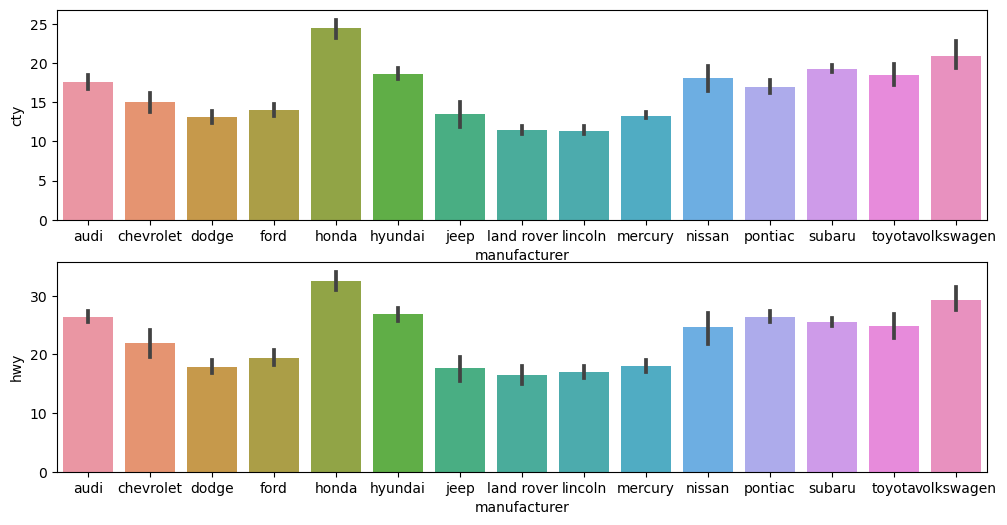

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))

sns.barplot(data=mpg, x="manufacturer", y="cty", ax=ax[0])
sns.barplot(data=mpg, x='manufacturer', y='hwy', ax=ax[1])

Shapiro-Wilk test:
Statistic: 0.9486, p-value: 0.5029


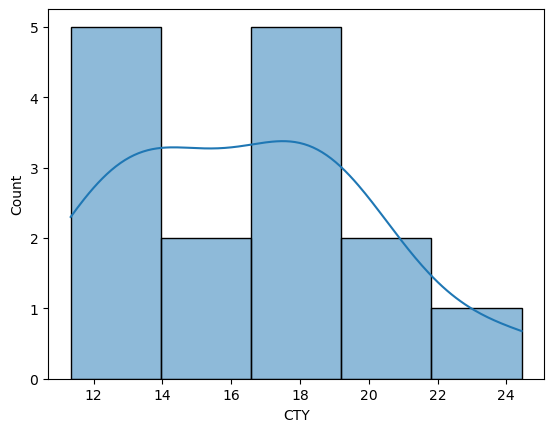

In [25]:
# 제조사별 cty 정규성 검증
data = mpg[['manufacturer', 'cty']]

grouped_data = data.groupby('manufacturer').mean()

stat, p = shapiro(grouped_data['cty'])
print('Shapiro-Wilk test:')
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

sns.histplot(data=grouped_data, x='cty', kde=True)
plt.xlabel('CTY')
plt.ylabel('Count')
plt.show()

# 약한 정규분포, 살짝 왼쪽으로 치우쳐져 있음

Shapiro-Wilk test:
Statistic: 0.9194, p-value: 0.1889


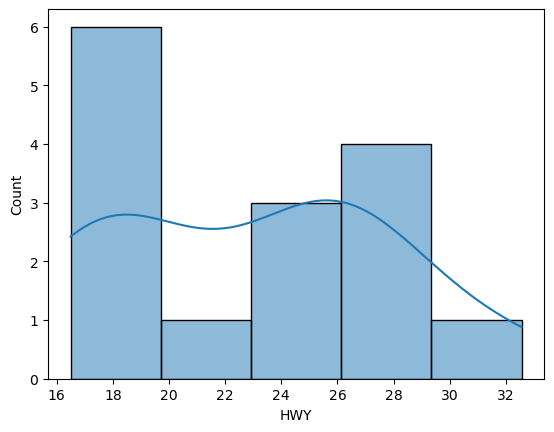

In [23]:
# 제조사별 hwy 정규성 검증
data = mpg[['manufacturer', 'hwy']]

grouped_data = data.groupby('manufacturer').mean()

stat, p = shapiro(grouped_data['hwy'])
print('Shapiro-Wilk test:')
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

sns.histplot(data=grouped_data, x='hwy', kde=True)
plt.xlabel('HWY')
plt.ylabel('Count')
plt.show()

# 아주 약한 정규분포, 불균형

### manufacturer들의 대표 model에 따른 cty와 hwy 평균 연비
- 제조사 별로 가장 인기있는 모델들을 뽑아서 진행
- 앞서 진행된 제조사별 cty와 hwy와 비슷한 순위

In [26]:
popular_models = mpg.groupby(['manufacturer', 'model']).size().reset_index(name='count')
popular_models = popular_models.sort_values(['manufacturer', 'count'], ascending=[True, False])
popular_models = popular_models.groupby('manufacturer').head(1)
popular_models

,manufacturer,model,count
1,audi,a4 quattro,8
3,chevrolet,c1500 suburban 2wd,5
7,dodge,caravan 2wd,11
14,ford,mustang,9
15,honda,civic,9
16,hyundai,sonata,7
18,jeep,grand cherokee 4wd,8
19,land rover,range rover,4
20,lincoln,navigator 2wd,3
21,mercury,mountaineer 4wd,4


<AxesSubplot:xlabel='model', ylabel='hwy'>

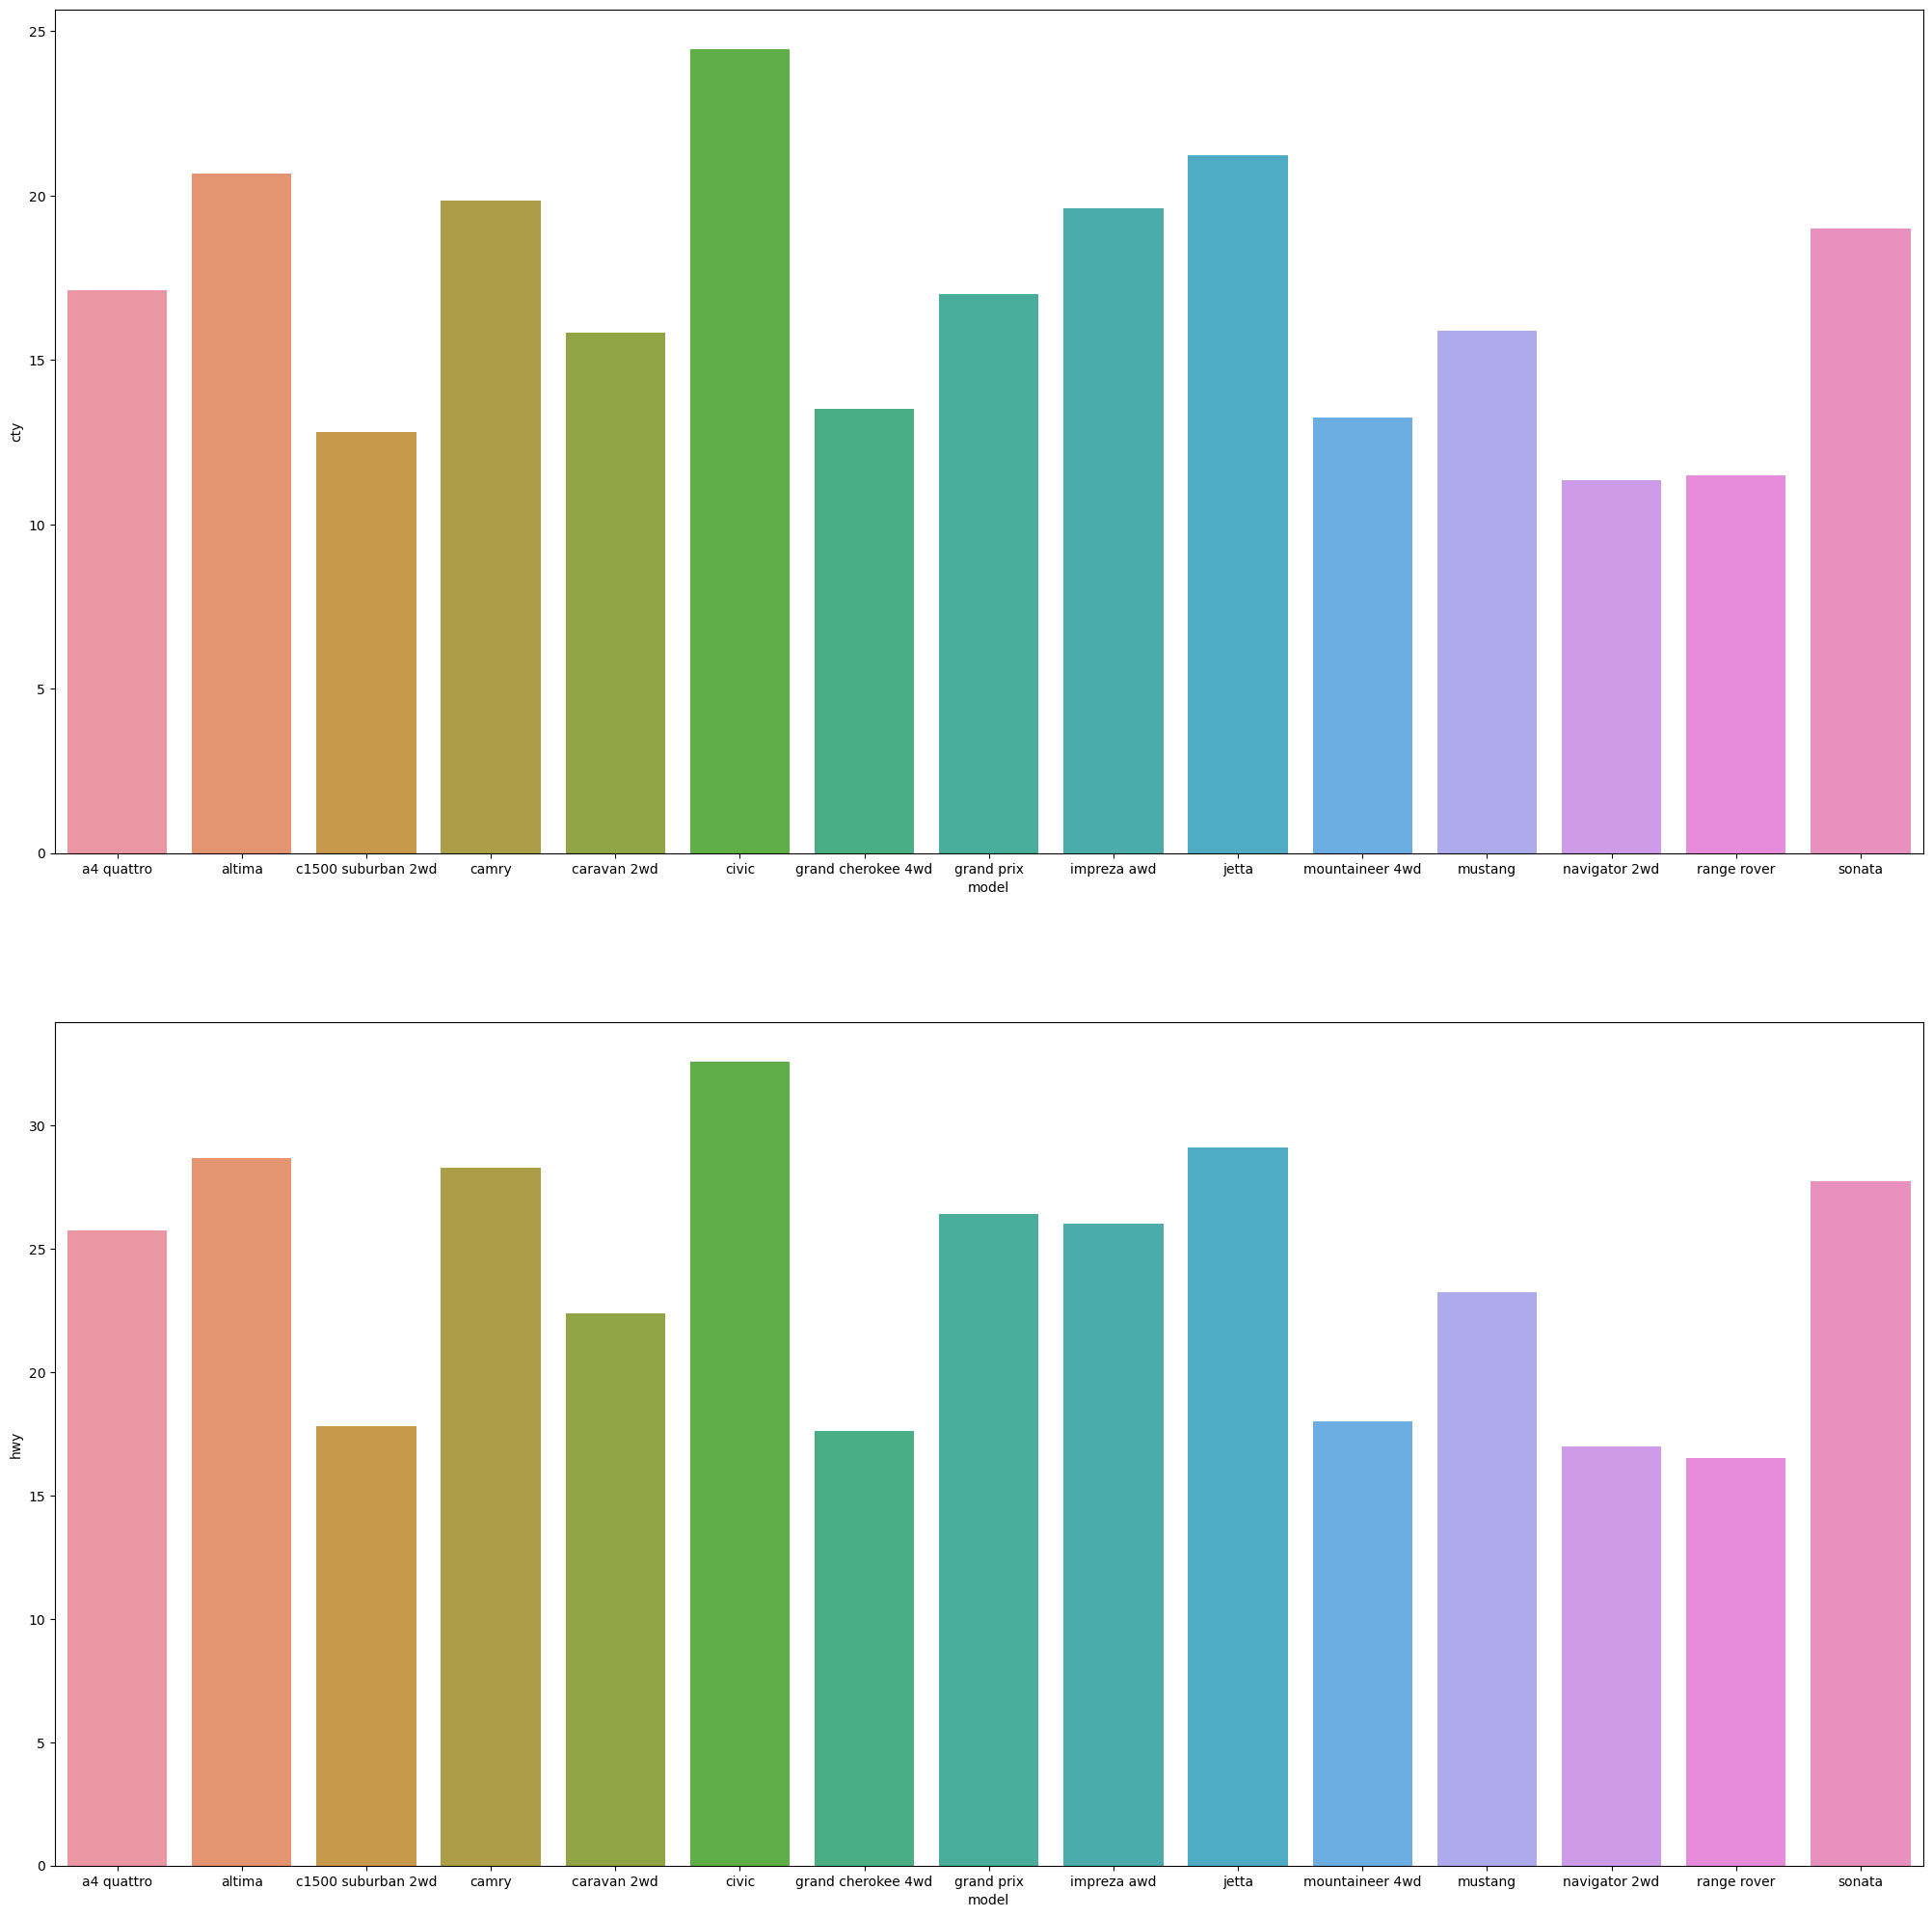

In [27]:
selected = ['a4 quattro', 'c1500 suburban 2wd', 'caravan 2wd', 'mustang', 'civic', 'sonata', 'grand cherokee 4wd', 'range rover', 'navigator 2wd', 'mountaineer 4wd', 'altima', 'grand prix', 'impreza awd', 'camry', 'jetta']

mpg_models = mpg[mpg['model'].isin(selected)]

mpg_models_cty = mpg_models.groupby('model')['cty'].mean().reset_index()
mpg_models_hwy = mpg_models.groupby('model')['hwy'].mean().reset_index()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(25, 25))

sns.barplot(data=mpg_models_cty, x='model', y='cty', ax=ax[0])
sns.barplot(data=mpg_models_hwy, x='model', y='hwy', ax=ax[1])

### trans 종류(auto, manual)에 따른 cty와 hwy
- trans 종류를 auto, manual로 이진분류
- manual이 auto보다 cty와 hwy 모두 높은 경향을 보인다.

Text(0.5, 1.0, 'Manual - HWY')

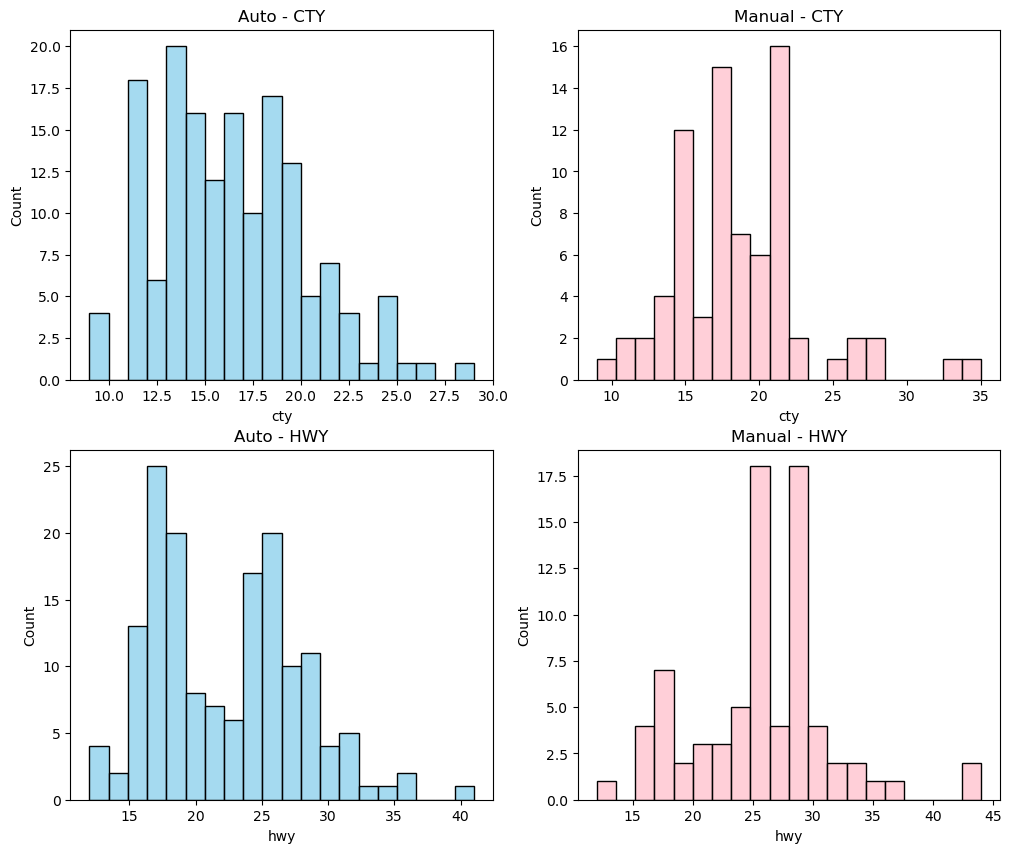

In [28]:
mpg['trans_type'] = mpg['trans'].apply(lambda x: 'auto' if 'auto' in x else 'manual')
mpg_auto = mpg[mpg['trans_type']== 'auto']
mpg_manual = mpg[mpg['trans_type']== 'manual']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.histplot(data=mpg_auto, x='cty', bins=20, ax=axs[0,0], color='skyblue')
sns.histplot(data=mpg_manual, x='cty', bins=20, ax=axs[0,1], color='pink')
sns.histplot(data=mpg_auto, x='hwy', bins=20, ax=axs[1,0], color='skyblue')
sns.histplot(data=mpg_manual, x='hwy', bins=20, ax=axs[1,1], color='pink')

axs[0,0].set_title('Auto - CTY')
axs[0,1].set_title('Manual - CTY')
axs[1,0].set_title('Auto - HWY')
axs[1,1].set_title('Manual - HWY')

Shapiro-Wilk test:
Statistic: 0.9802, p-value: 0.9660


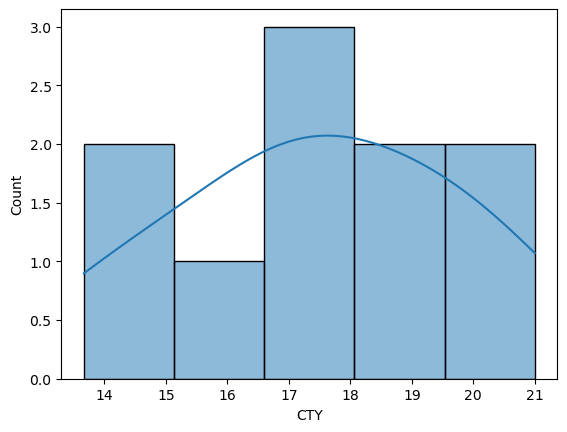

In [29]:
# trans별 cty 정규성 검증
data = mpg[['trans', 'cty']]

grouped_data = data.groupby('trans').mean()

stat, p = shapiro(grouped_data['cty'])
print('Shapiro-Wilk test:')
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

sns.histplot(data=grouped_data, x='cty', kde=True)
plt.xlabel('CTY')
plt.ylabel('Count')
plt.show()

# 정규분포, 살짝 오른쪽으로 치우쳐져있음

Shapiro-Wilk test:
Statistic: 0.9171, p-value: 0.3332


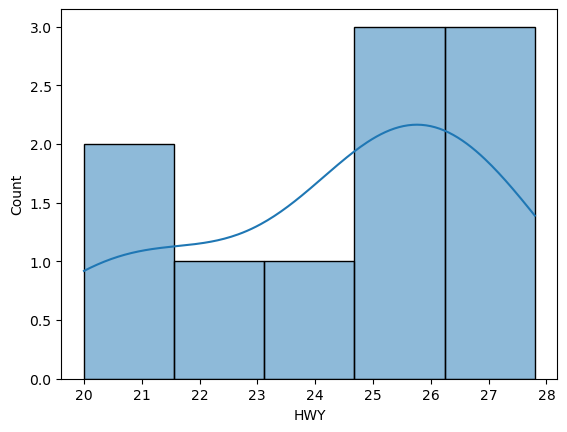

In [30]:
# trans별 hwy 정규성 검증
data = mpg[['trans', 'hwy']]

grouped_data = data.groupby('trans').mean()

stat, p = shapiro(grouped_data['hwy'])
print('Shapiro-Wilk test:')
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

sns.histplot(data=grouped_data, x='hwy', kde=True)
plt.xlabel('HWY')
plt.ylabel('Count')
plt.show()

# 약한 정규분포, 오른쪽으로 많이 치우쳐져있음

### drv 방식에 따른 cty와 hwy의 평균 연비
- f의 경우, cty가 hwy보다 낮은 경향
- 4의 경우, cty가 hwy보다 조금 낮은 경향
- r의 경우, cty가 hwy보다 낮은 경향

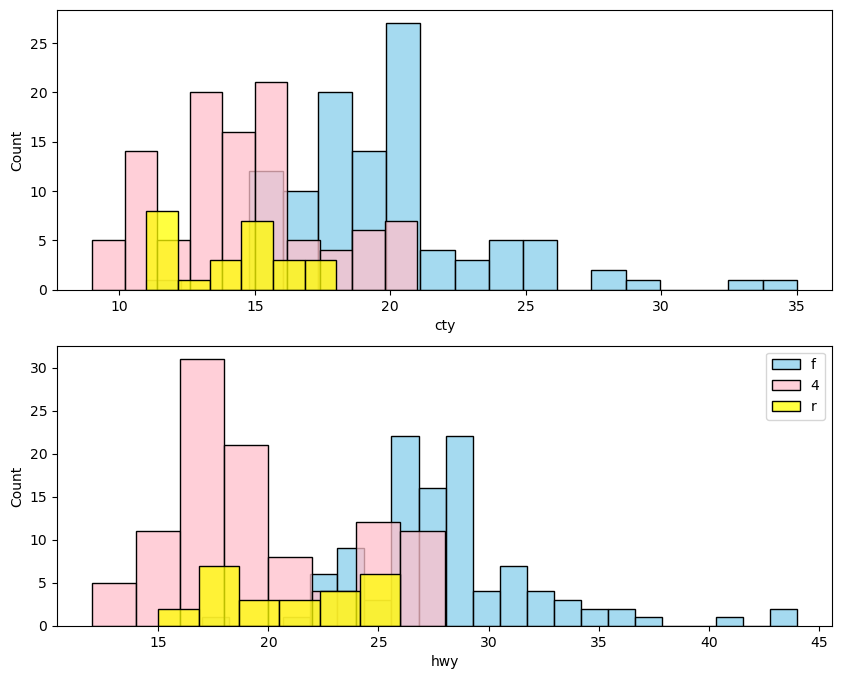

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(data=mpg[mpg['drv']=='f'], x='cty', ax=ax[0], label='f', color='skyblue')
sns.histplot(data=mpg[mpg['drv']=='4'], x='cty', ax=ax[0], label='4', color='pink')
sns.histplot(data=mpg[mpg['drv']=='r'], x='cty', ax=ax[0], label='r', color='yellow')
sns.histplot(data=mpg[mpg['drv']=='f'], x='hwy', ax=ax[1], label='f', color='skyblue')
sns.histplot(data=mpg[mpg['drv']=='4'], x='hwy', ax=ax[1], label='4', color='pink')
sns.histplot(data=mpg[mpg['drv']=='r'], x='hwy', ax=ax[1], label='r', color='yellow')

plt.legend()

### category에 따른 cty와 hwy
- compact, midsize, subcombact가 cty와 hwy 모두 높은 경향
- suv, pickup이 가장 cty와 hwy 모두 낮은 경향
- 차가 클수록 연비 낮은 경향

<AxesSubplot:xlabel='category', ylabel='hwy'>

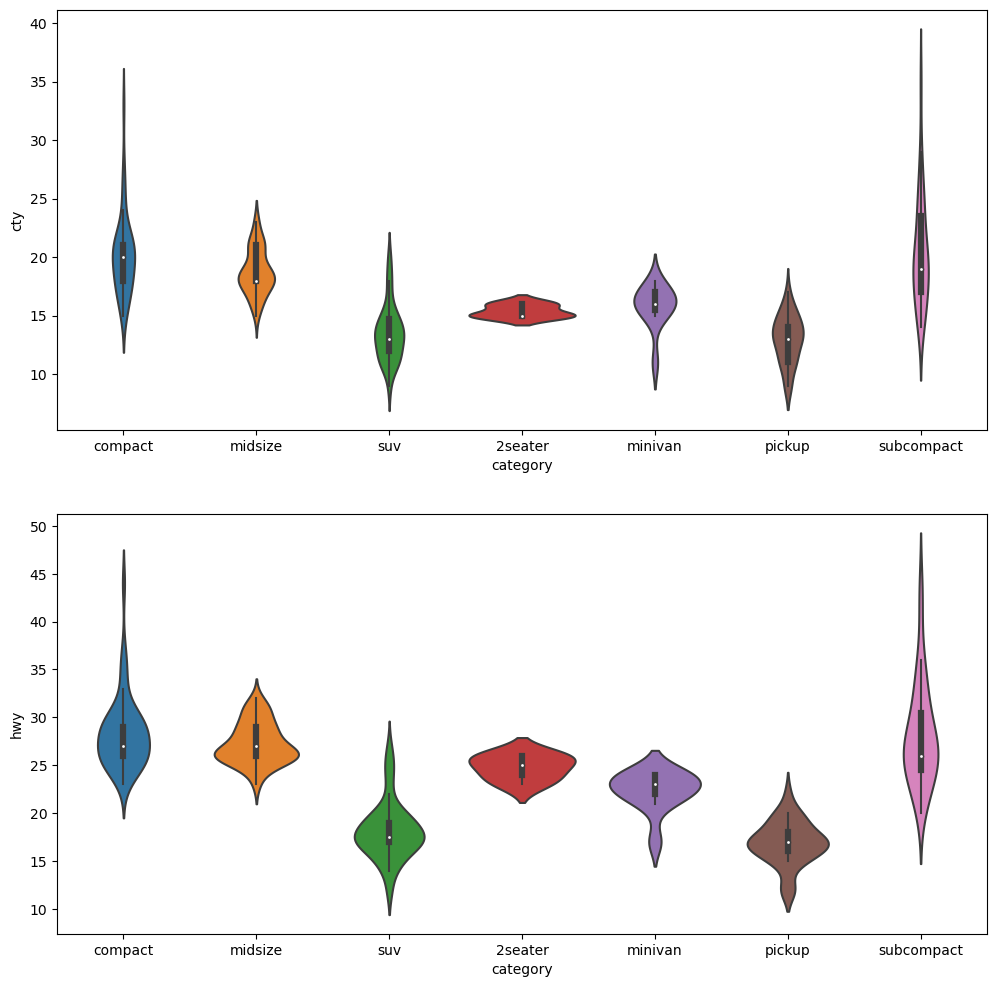

In [33]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))

sns.violinplot(data=mpg, x='category', y='cty', ax=ax[0])
sns.violinplot(data=mpg, x='category', y='hwy', ax=ax[1])

### displ에 따른 cty와 hwy
- displ이 높음과 낮음으로 이진분류
- 높은 차량의 경우, cty와 hwy 모두 낮은 경향
- 낮은 차량의 경우, cty와 hwy 모두 높은 경향

Text(0.5, 1.0, 'Low Displ - HWY')

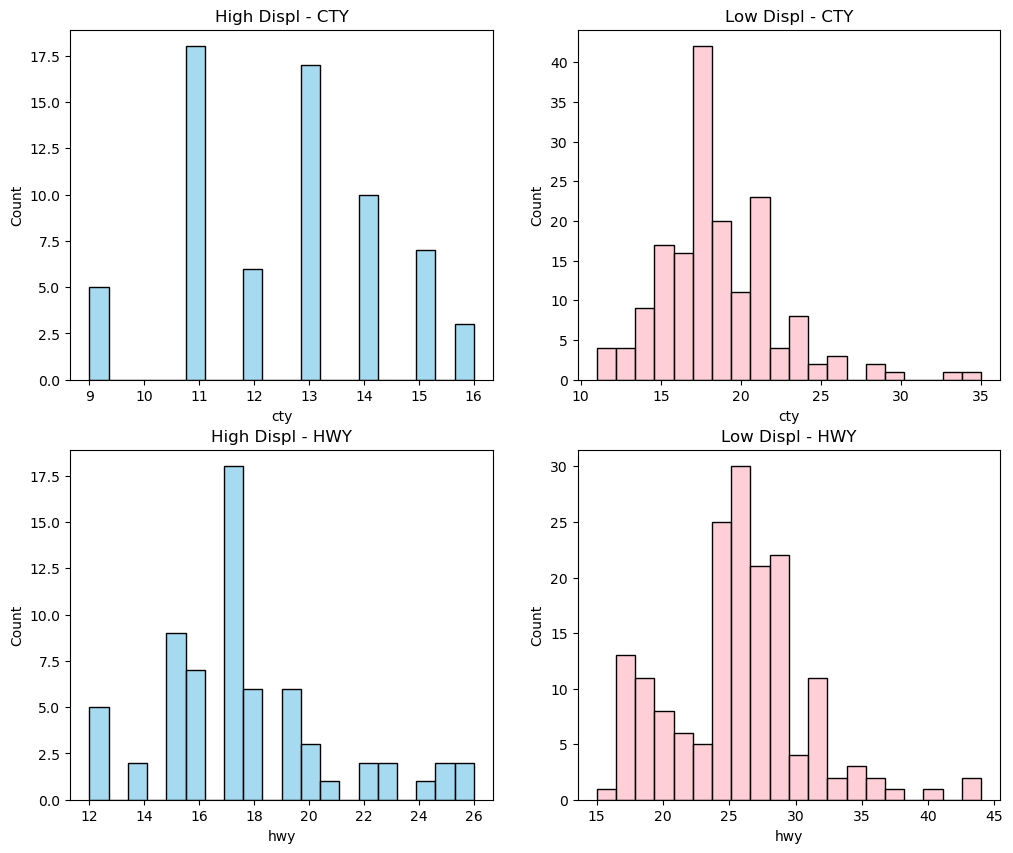

In [35]:
mpg['displ_category'] = np.where(mpg['displ'] >= 4.5, '높은차량', '낮은차량')
mpg_high = mpg[mpg['displ_category']== '높은차량']
mpg_low = mpg[mpg['displ_category']== '낮은차량']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.histplot(data=mpg_high, x='cty', bins=20, ax=axs[0,0], color='skyblue')
sns.histplot(data=mpg_low, x='cty', bins=20, ax=axs[0,1], color='pink')
sns.histplot(data=mpg_high, x='hwy', bins=20, ax=axs[1,0], color='skyblue')
sns.histplot(data=mpg_low, x='hwy', bins=20, ax=axs[1,1], color='pink')

axs[0,0].set_title('High Displ - CTY')
axs[0,1].set_title('Low Displ - CTY')
axs[1,0].set_title('High Displ - HWY')
axs[1,1].set_title('Low Displ - HWY')

Shapiro-Wilk test:
Statistic: 0.8587, p-value: 0.0004


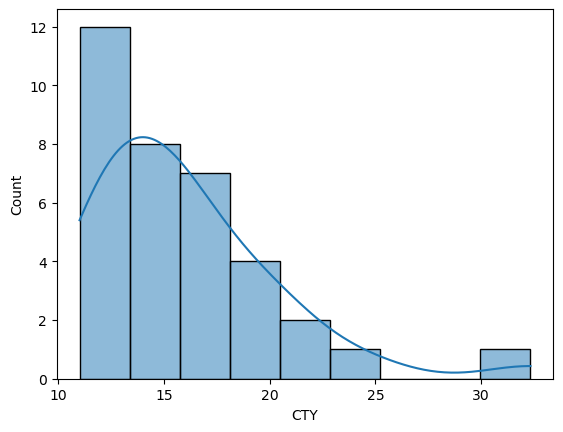

In [36]:
# displ별 cty 정규성 검증
data = mpg[['displ', 'cty']]

grouped_data = data.groupby('displ').mean()

stat, p = shapiro(grouped_data['cty'])
print('Shapiro-Wilk test:')
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

sns.histplot(data=grouped_data, x='cty', kde=True)
plt.xlabel('CTY')
plt.ylabel('Count')
plt.show()

# 정규성 가정 기각, 정규분포라고 할 수 없음. 과하게 왼쪽으로 치우쳐져 있음

Shapiro-Wilk test:
Statistic: 0.8924, p-value: 0.0025


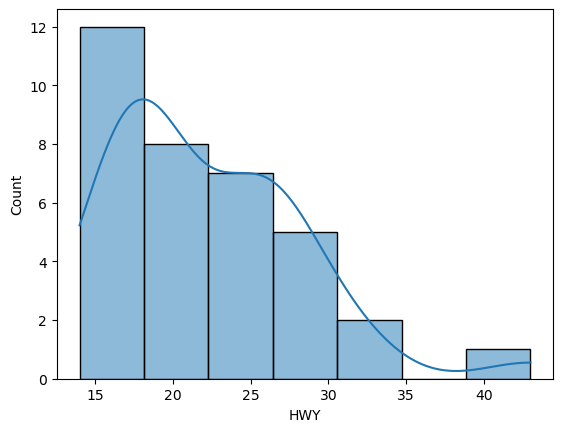

In [38]:
# displ별 hwy 정규성 검증
data = mpg[['displ', 'hwy']]

grouped_data = data.groupby('displ').mean()

stat, p = shapiro(grouped_data['hwy'])
print('Shapiro-Wilk test:')
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

sns.histplot(data=grouped_data, x='hwy', kde=True)
plt.xlabel('HWY')
plt.ylabel('Count')
plt.show()

# 정규성 가정 기각, 정규분포라고 할 수 없음. 과하게 왼쪽으로 치우쳐져 있음

### year에 따른 cty와 hwy
- 2008(최근 생산된 차량)의 경우 cty와 hwy 모두 1999(오래전에 생산된 차량)의 경우보다 높다.

Text(0.5, 1.0, '2008 - HWY')

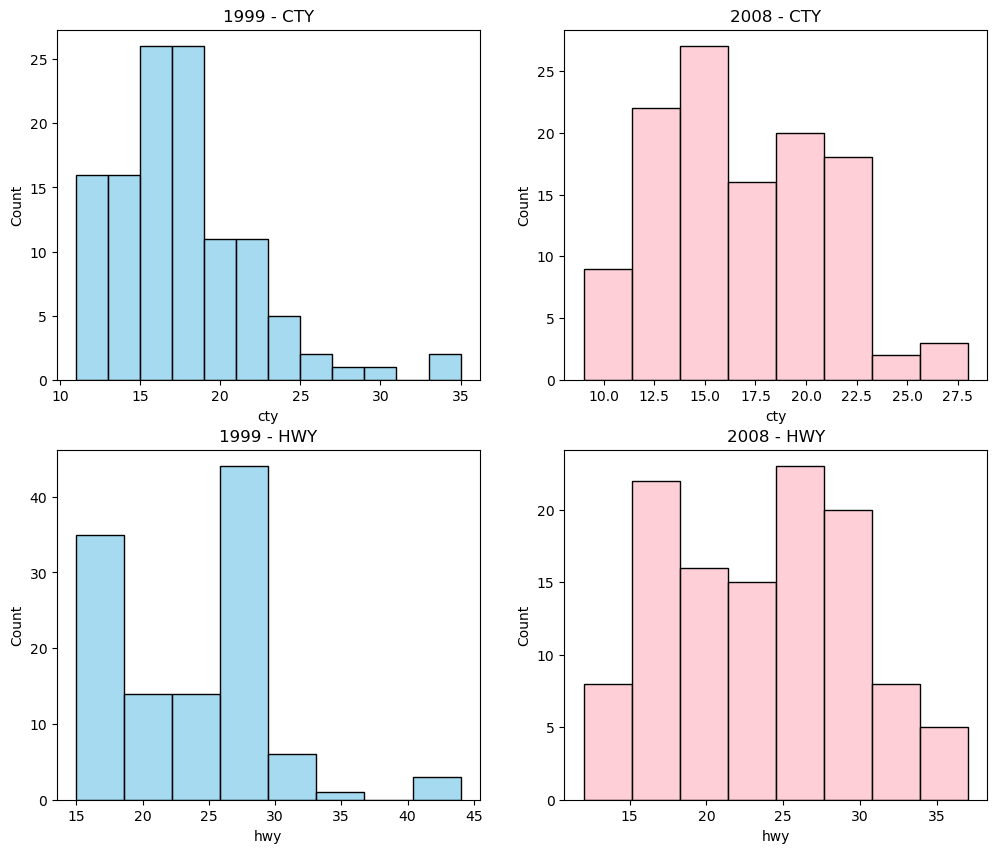

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.histplot(data=mpg[mpg['year']==1999], x='cty', ax=axs[0,0], color='skyblue')
sns.histplot(data=mpg[mpg['year']==2008], x='cty', ax=axs[0,1], color='pink')
sns.histplot(data=mpg[mpg['year']==1999], x='hwy', ax=axs[1,0], color='skyblue')
sns.histplot(data=mpg[mpg['year']==2008], x='hwy', ax=axs[1,1], color='pink')

axs[0,0].set_title('1999 - CTY')
axs[0,1].set_title('2008 - CTY')
axs[1,0].set_title('1999 - HWY')
axs[1,1].set_title('2008 - HWY')

### cyl에 따른 cty와 hwy
- cyl 개수가 적을 수록 cty와 hwy가 높은 경향

<AxesSubplot:xlabel='cyl', ylabel='hwy'>

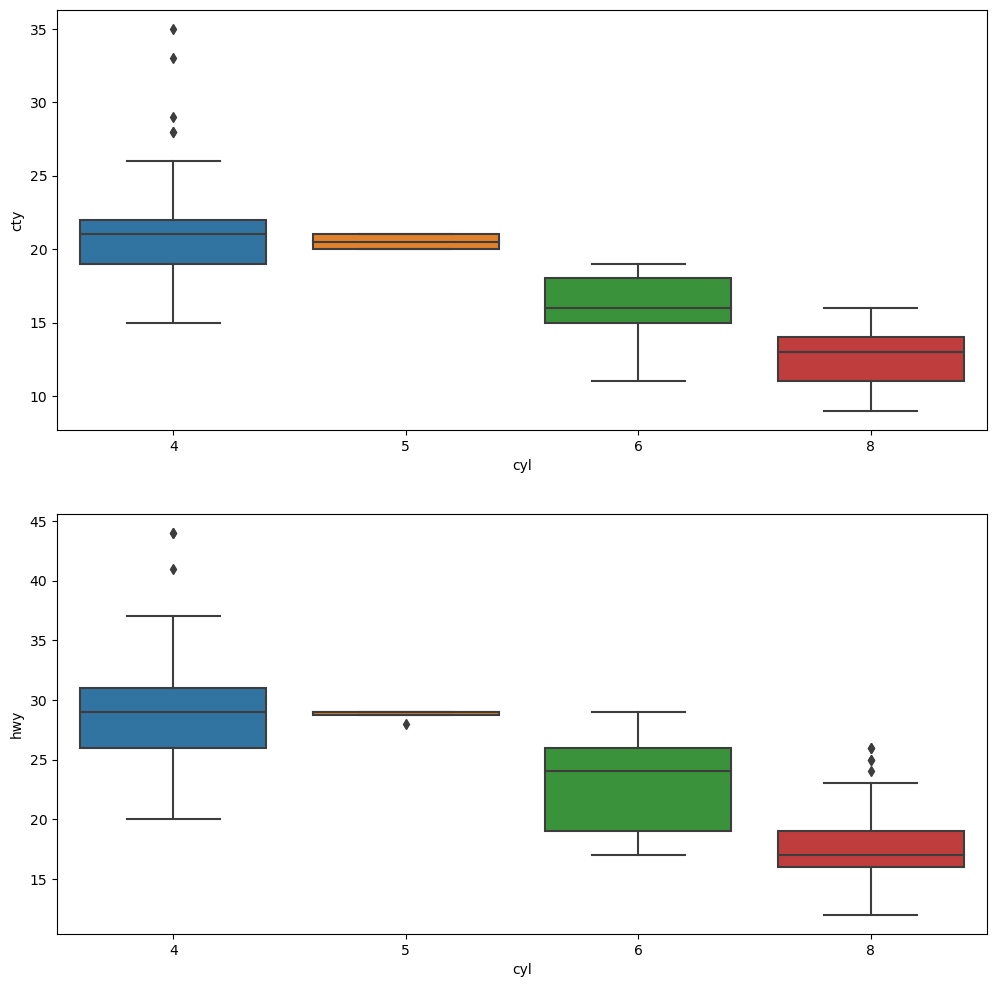

In [41]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))

sns.boxplot(data=mpg, x='cyl', y='cty', ax=ax[0])
sns.boxplot(data=mpg, x='cyl', y='hwy', ax=ax[1])